In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv(r"phishing.csv")

In [11]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [12]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [13]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [14]:
df.shape

(11054, 32)

In [15]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score

In [17]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [18]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [19]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [20]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [21]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

In [23]:
logreg_predict= model_1.predict(test_X)

In [24]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [25]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [26]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

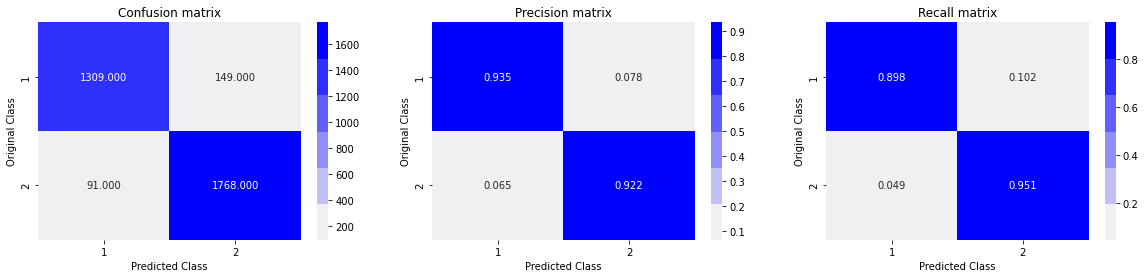

In [27]:
plot_confusion_matrix(test_Y, logreg_predict)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

In [30]:
knn_predict=model_2.predict(test_X)

In [31]:
accuracy_score(knn_predict,test_Y)

0.6352125414531203

In [32]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.64      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.64      0.64      0.64      3317



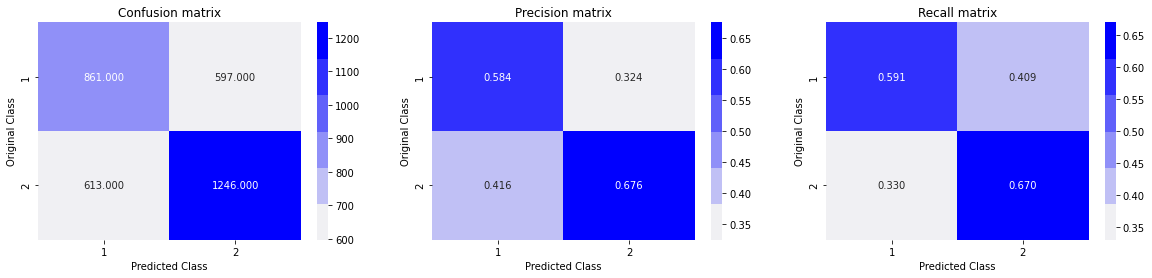

In [33]:
plot_confusion_matrix(test_Y, knn_predict)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [36]:
dtree_predict=model_3.predict(test_X)

In [37]:
accuracy_score(dtree_predict,test_Y)

0.9481459149834187

In [38]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1422
           1       0.96      0.95      0.95      1895

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



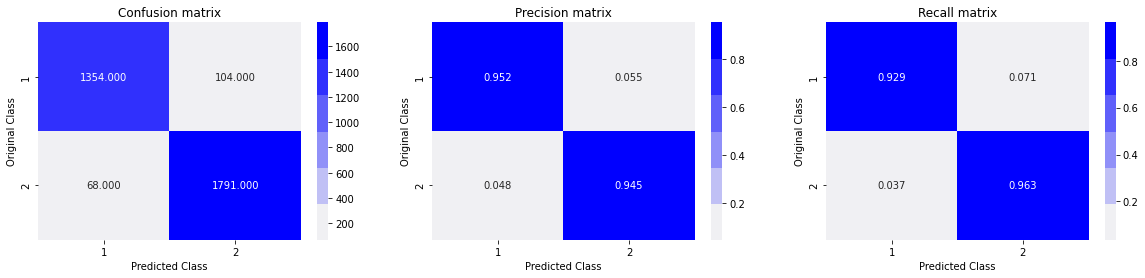

In [39]:
plot_confusion_matrix(test_Y, dtree_predict)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

In [42]:
rfc_predict=model_4.predict(test_X)

In [43]:
accuracy_score(rfc_predict,test_Y)

0.9716611395839614

In [44]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1432
           1       0.98      0.97      0.97      1885

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



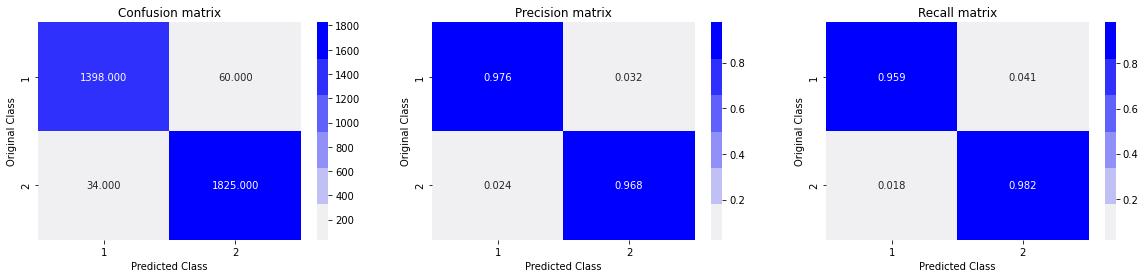

In [45]:
plot_confusion_matrix(test_Y, rfc_predict)

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

In [48]:
svm_predict=model_5.predict(test_X)

In [49]:
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [50]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



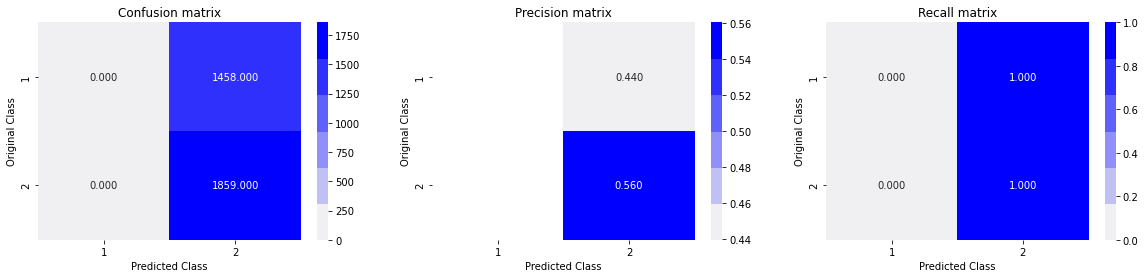

In [51]:
plot_confusion_matrix(test_Y, svm_predict)

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

In [54]:
adc_predict=model_6.predict(test_X)

In [55]:
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [56]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



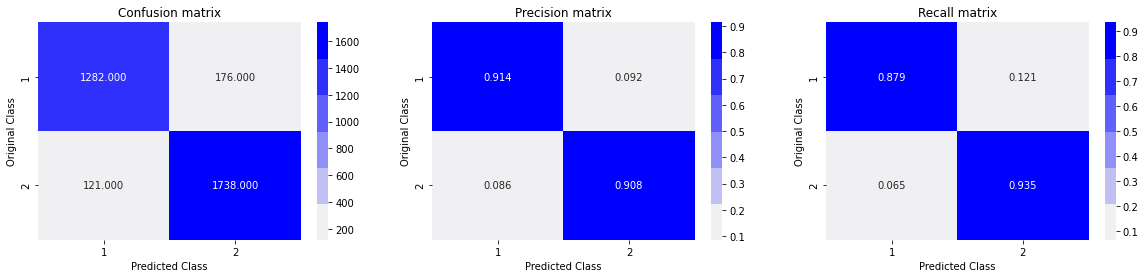

In [57]:
plot_confusion_matrix(test_Y, adc_predict)

In [58]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('Support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))

Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6352125414531203
Decision Tree Classifier Accuracy: 0.9481459149834187
Random Forest Classifier Accuracy: 0.9716611395839614
Support Vector Machine Accuracy: 0.5604461863129334
Adaboost Classifier Accuracy: 0.9104612601748568


In [ ]:
df.columns

In [ ]:
X=df[['PrefixSuffix-','AnchorURL']]
X.head()

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

In [ ]:
model_8=logreg.fit(train_X,train_Y)

In [ ]:
logreg_predict=model_8.predict(test_X)

In [ ]:
accuracy_score(test_Y,logreg_predict)

In [ ]:
logreg.classes_

In [ ]:
x = np.array(X)
x